In [7]:
%matplotlib inline
from equadratures import *
import numpy as np

<h1> The Padua Points in 3D </h1>

The objective of this note is to demonstrate how various linear algebra (and convex optimization) heuristics can be used for finding the Gauss quadrature points!

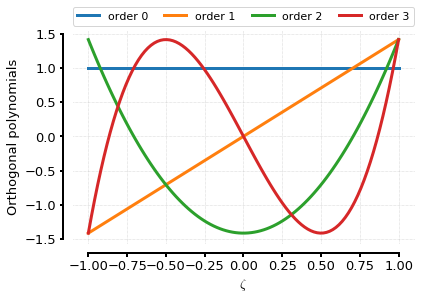

In [20]:
M = 3
x1 = Parameter(param_type='Chebyshev', order=M, lower=-1., upper=1., Lobatto=True)
x2 = Parameter(param_type='Chebyshev', order=M+1, lower=-1., upper=1., Lobatto=True)
x3 = Parameter(param_type='Chebyshev', order=M+2, lower=-1., upper=1., Lobatto=True)
totalorder = Basis('Total order', [M, M, M])
u = np.linspace(-1., 1., 100)
P, _ = x1._getOrthoPoly(u)
polynomialplot(P, u)

In [21]:
Polyobject = Polylsq(parameters=[x1, x2, x3], basis=totalorder, mesh='tensor', optimization='newton', oversampling=1.0)
pfull, wfull = Polyobject.getTensorQuadratureRule()

(210, 20)


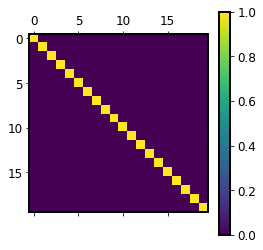

In [22]:
M = np.dot(Polyobject.A.T , Polyobject.A)
plt.matshow(M, interpolation='none')
plt.colorbar()
print Polyobject.A.shape

(20, 20)


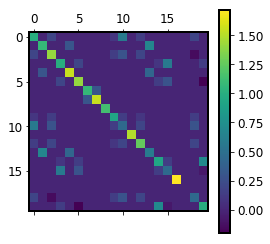

In [23]:
M = np.dot(Polyobject.Az.T , Polyobject.Az)
plt.matshow(M, interpolation='none')
plt.colorbar()
print Polyobject.Az.shape

In [ ]:
#fig = plt.figure()
#ax = fig.add_subplot(1,1,1)
#plt.scatter(pfull[:,0], pfull[:,1], marker='o', s=180, alpha=0.1, color='dimgrey',linewidth=2., label='Chebyshev grid')
#plt.scatter(Polyobject.pts[:,0], Polyobject.pts[:,1], marker='d', s=110, alpha=0.7, color='limegreen',linewidth=1.2, label='Convex')
#adjust_spines(ax, ['left', 'bottom'])
#plt.grid(b=True, which='major', color='gray', linestyle='-', linewidth=0.2)
#plt.grid(b=True, which='minor', color='gray', linestyle='-', linewidth=0.2)
#plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,ncol=5, mode="expand", borderaxespad=0., fontsize=11)
#frame1 = plt.gca()
#plt.xlabel('$\zeta_1$')
#plt.ylabel('$\zeta_2$')
#plt.show()